# Required Libraries

In [25]:
%matplotlib inline

from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import math
import yfinance as yf
import numpy as np

#  Setup The Variables

In [26]:
yesterday: str = (datetime.today() - timedelta(days=1)).strftime('%Y-%m-%d')
days_ago_hour: str = (datetime.today() - timedelta(days=720)).strftime('%Y-%m-%d')
today = datetime.today().strftime('%Y-%m-%d')

windows = [30, 60, 90, 120, 180]
quantiles = [0.25, 0.75]

min_ = []
max_ = []
median = []
top_q = []
bottom_q = []
realized = []

data = yf.download("", start=days_ago_hour, end=today, interval = "1d")

[*********************100%***********************]  1 of 1 completed


# Realised Volatility

In [27]:
def realized_vol(price_data, window=30):

    log_return = (price_data["Close"] / price_data["Close"].shift(1)).apply(np.log)

    return log_return.rolling(window=window, center=False).std() * math.sqrt(252)


for window in windows:
    
    # get a dataframe with realized volatility
    estimator = realized_vol(window=window, price_data=data)
    
    # append the summary stats to a list
    min_.append(estimator.min())
    max_.append(estimator.max())
    median.append(estimator.median())
    top_q.append(estimator.quantile(quantiles[1]))
    bottom_q.append(estimator.quantile(quantiles[0]))
    realized.append(estimator[-1])

#  Plot Results

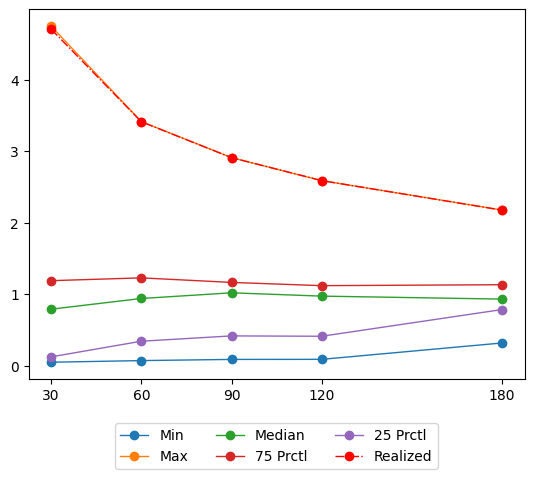

In [28]:
# create the plots on the chart
plt.plot(windows, min_, "-o", linewidth=1, label="Min")
plt.plot(windows, max_, "-o", linewidth=1, label="Max")
plt.plot(windows, median, "-o", linewidth=1, label="Median")
plt.plot(windows, top_q, "-o", linewidth=1, label=f"{quantiles[1] * 100:.0f} Prctl")
plt.plot(windows, bottom_q, "-o", linewidth=1, label=f"{quantiles[0] * 100:.0f} Prctl")
plt.plot(windows, realized, "ro-.", linewidth=1, label="Realized")

# set the x-axis labels
plt.xticks(windows)

# format the legend
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=3)
